# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import Dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

In [4]:
#checking info and describe dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

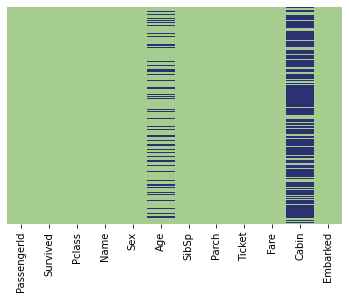

In [6]:
#Checking missing data using sns.heatmap
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="crest")

In [7]:
#In this case, we can see that Age and Cabin column has missing data.
#In Age column, we can replace the missing data with some from imputation. Cause the missing data roughly 20% reasonable to replaces
#In Cabin column, we can drop this column cause many missing data there.

<AxesSubplot:xlabel='Survived', ylabel='count'>

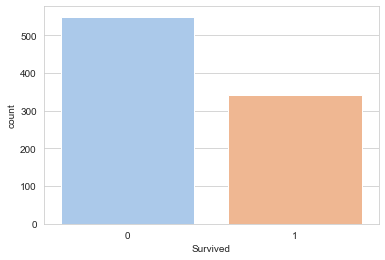

In [9]:
#Visualization of Survived Passenger
sns.set_style('whitegrid')
sns.countplot(data=train, x="Survived", palette="pastel")

<AxesSubplot:xlabel='Survived', ylabel='count'>

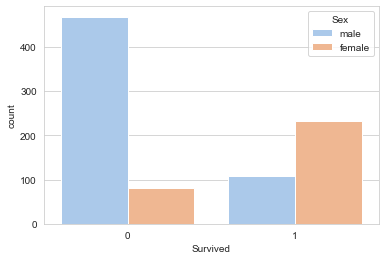

In [11]:
#Survived with Gender
sns.set_style('whitegrid')
sns.countplot(data=train, x="Survived", hue="Sex", palette="pastel")

<AxesSubplot:xlabel='Survived', ylabel='count'>

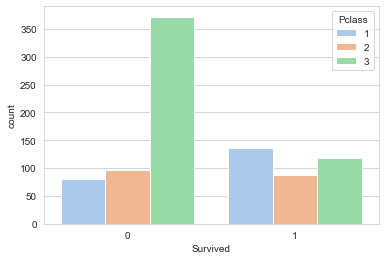

In [12]:
#Survived with Pclass
sns.set_style('whitegrid')
sns.countplot(data=train, x="Survived", hue="Pclass", palette="pastel")

# Preprocessing

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

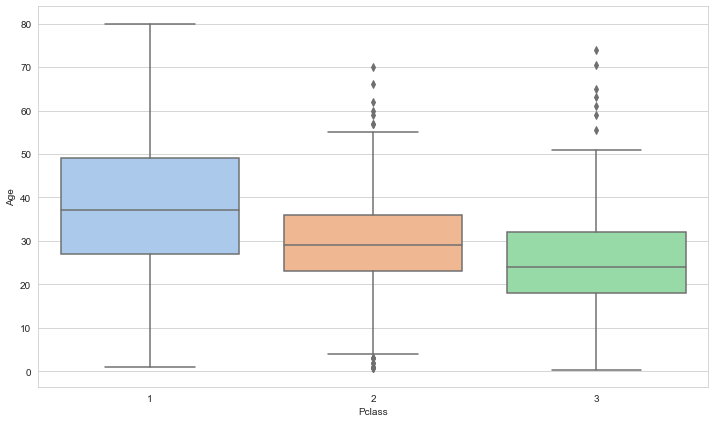

In [14]:
#Looking for mean of Age in every Pclass column to fill the missing data
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='pastel')

In [15]:
#Pclass 1 has mean 37, Pclass 2 has mean 29, Pclass 3 has mean 24

In [16]:
#Write function to fill the missing data
def missing_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
#Apply function in Age Column
train['Age'] = train[['Age','Pclass']].apply(missing_age,axis=1)

<AxesSubplot:>

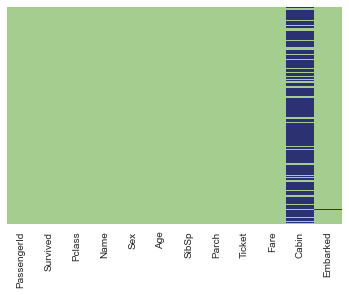

In [18]:
#Check the heatmap again
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='crest')

In [19]:
#Drop Cabin Column
train.drop('Cabin',axis=1,inplace=True)

In [20]:
#Drop NaN value in Embarked Column
train.dropna(inplace=True)

<AxesSubplot:>

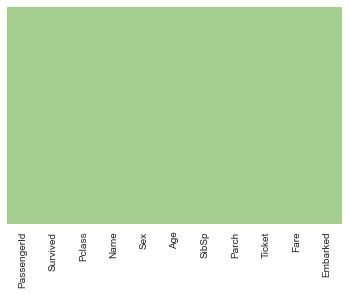

In [21]:
#Check the heatmap again
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='crest')

In [22]:
#Now we dont have any missing data, check head dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
#Change Categorical Values into Numerical Values (Sex and Embarked Column)
sex = pd.get_dummies(train['Sex'],drop_first=True)
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [26]:
#Drop Useless Column
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [28]:
#Add sex and embarked to dataframe
train = pd.concat([train,sex,embarked],axis=1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [30]:
#Data is ready for Modeling

# Building a K Nearest Neighbors Model

In [31]:
#X and y data
X = train.drop("Survived", axis=1)
y = train["Survived"]

In [32]:
#Split Dataset
from sklearn.model_selection import train_test_split

In [34]:
#Using 80:20 for train and test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [35]:
#Importing KNN model
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=1)

In [37]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Prediction and Evaluation

In [38]:
predictions = knn.predict(X_test)

In [39]:
#Importing classification report, confusion matrix and accuracy score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [47]:
#Print Report
print(f"Confusion Matrix : \n\n {confusion_matrix(y_test,predictions)}")
print(f"\nClassification Report : \n\n {classification_report(y_test,predictions)}")
print(f"Accuracy score : {accuracy_score(y_test , predictions)}")

Confusion Matrix : 

 [[68 39]
 [32 39]]

Classification Report : 

               precision    recall  f1-score   support

           0       0.68      0.64      0.66       107
           1       0.50      0.55      0.52        71

    accuracy                           0.60       178
   macro avg       0.59      0.59      0.59       178
weighted avg       0.61      0.60      0.60       178

Accuracy score : 0.601123595505618


# Choosing K Value for better prediction

In [48]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

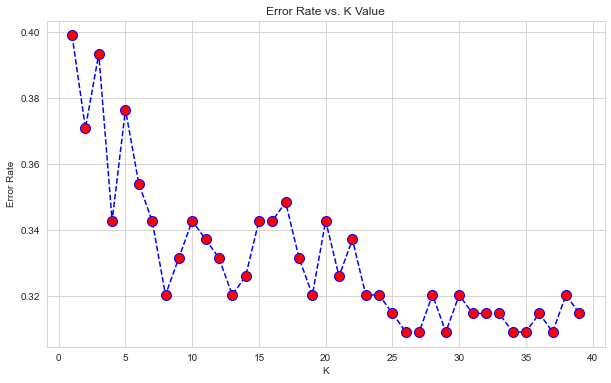

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Retrain Model with new K Value

In [52]:
#new k value = 26. Lowest Error Rate
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=26')
print(f"Confusion Matrix : \n\n {confusion_matrix(y_test,pred)}")
print(f"\nClassification Report : \n\n {classification_report(y_test,pred)}")
print(f"Accuracy score : {accuracy_score(y_test , pred)}")

WITH K=26
Confusion Matrix : 

 [[104   3]
 [ 52  19]]

Classification Report : 

               precision    recall  f1-score   support

           0       0.67      0.97      0.79       107
           1       0.86      0.27      0.41        71

    accuracy                           0.69       178
   macro avg       0.77      0.62      0.60       178
weighted avg       0.75      0.69      0.64       178

Accuracy score : 0.6910112359550562


# Building a Random Forest Model

In [53]:
#Importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [54]:
#Random Forest with n_estimators = 100
rfc = RandomForestClassifier(n_estimators=100)

In [55]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

# Prediction and Evaluation with Random Forest

In [56]:
rfc_pred = rfc.predict(X_test)

In [57]:
#Print Report
print(f"Confusion Matrix : \n\n {confusion_matrix(y_test,rfc_pred)}")
print(f"\nClassification Report : \n\n {classification_report(y_test,rfc_pred)}")
print(f"Accuracy score : {accuracy_score(y_test , rfc_pred)}")

Confusion Matrix : 

 [[98  9]
 [18 53]]

Classification Report : 

               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.85      0.75      0.80        71

    accuracy                           0.85       178
   macro avg       0.85      0.83      0.84       178
weighted avg       0.85      0.85      0.85       178

Accuracy score : 0.848314606741573


# Building a Logistic Regression Model

In [58]:
#Importing Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [59]:
logmodel = LogisticRegression()

In [60]:
logmodel.fit(X_train,y_train)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Prediction and Evaluation with Logistic Regression

In [61]:
logmodel_pred = logmodel.predict(X_test)

In [62]:
#Print Report
print(f"Confusion Matrix : \n\n {confusion_matrix(y_test,logmodel_pred)}")
print(f"\nClassification Report : \n\n {classification_report(y_test,logmodel_pred)}")
print(f"Accuracy score : {accuracy_score(y_test , logmodel_pred)}")

Confusion Matrix : 

 [[99  8]
 [25 46]]

Classification Report : 

               precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.85      0.65      0.74        71

    accuracy                           0.81       178
   macro avg       0.83      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178

Accuracy score : 0.8146067415730337
